#### SWIGGY RESTAURANTS ANALYSIS

In [1]:
# Importing the libraies needed for the various visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Brining in your dataset

Swiggy = pd.read_csv('swiggy.csv')

In [3]:
# checking out the columns that you have in your dataset
Swiggy.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

#### Data Dictionary

1.	ID: Unique identifier for the restaurant entry.

2.	Area: Area in the city where the restaurant is located.

3.	City: City where the restaurant is located.

4.	Restaurant: Name of the restaurant.

5.	Price: Average price of meals at the restaurant.

6.	Avg ratings: Average rating of the restaurant.

7.	Total ratings: Total number of ratings received by the restaurant.

8.	Food type: Types of food served at the restaurant.

9.	Address: Address of the restaurant.

10.	Delivery time: Average delivery time in minutes.


#### ANALYSIS

Text(0.5, 0, 'Price')

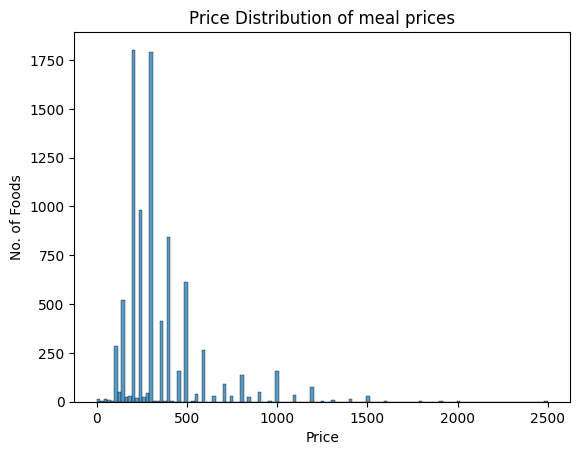

In [4]:
"""Price distribution : This visualization is aimed at checking the 
prices of meals in all the restaurants to check if the price is affecting the rate at which customer orders."""

sns.histplot(data=Swiggy, x='Price').set_title('Price Distribution of meal prices')
plt.ylabel('No. of Foods')
plt.xlabel('Price')

#### INTERPRETATION : As expected, the food selling batween 0 - 500 are the ones that are ordered most by the customers. The higher the price, the lesser the order.

Text(0, 0.5, 'Count of Ratings')

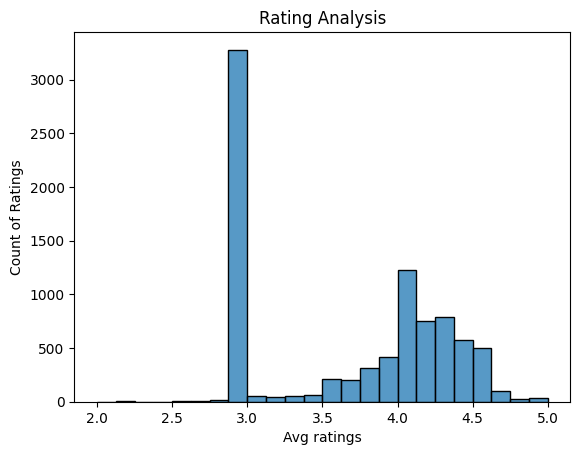

In [5]:
"""Rating Analysis: This visual is aimed at checking the ratings of each restaurant which can also help decide
on the restaurant to go when making decisions"""

sns.histplot(data=Swiggy,x='Avg ratings').set_title('Rating Analysis')
plt.ylabel('Count of Ratings')


#### INTERPRETATION : Most of the restaurants are average and are rated 3, a few of them are exceptional. Restaurants should work on their customer services to increase average ratings and inturn increase partronage.

Text(0.5, 1.0, 'Correlation of Total Ratings VS. Avg Rating')

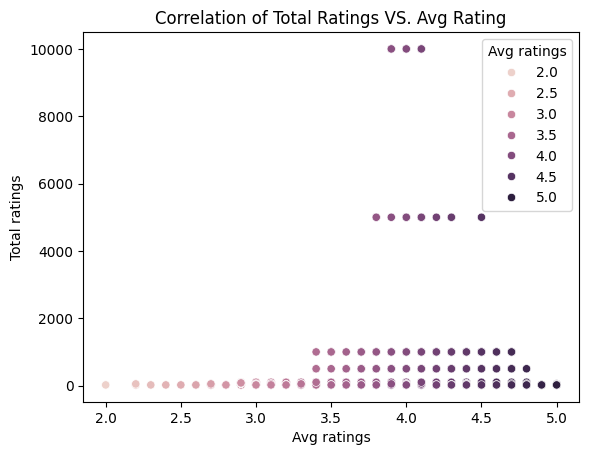

In [6]:
sns.scatterplot(data= Swiggy,x='Avg ratings',y='Total ratings',hue='Avg ratings').set_title('Correlation of Total Ratings VS. Avg Rating')

In [13]:
# Correlation analysis between total ratings & avg ratings
pearson_corr = Swiggy[['Total ratings', 'Avg ratings']].corr('pearson')
pearson_corr

,Total ratings,Avg ratings
Total ratings,1.0000,0.1579
Avg ratings,0.1579,1.0000


#### INTERPRETATION : This is checked if there's correlation between the average rating and the total ratings. It showed that there's correlation between them.

The pearson's correlation was used because it is the best to use when we have two continoius variables. The diagonal results is 1.0000 because the correlation of a value against itself is always 1 and that called Positive Correlation.

The result showed a small positive correlation between Total Ratings and Avg Ratings.

Text(0, 0.5, 'Count of Food')

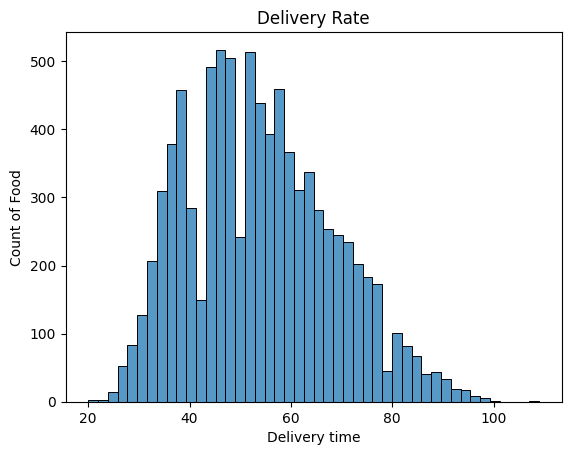

In [8]:
""""Delivery Analysis: This is aimed at checking the speed or how fast the food gets to the 
customers when they order."""

sns.histplot(data=Swiggy,x ='Delivery time').set_title('Delivery Rate')
plt.ylabel('Count of Food')

#### INTERPRETATION : The bulk of orders take between 30 mins to an hour and some of the orders extend longer than that, appropriate measures should be taken on how food get to customers faster. These are part of the factors that affect ratings.

Text(0.5, 1.0, 'No. of Restaurants per City')

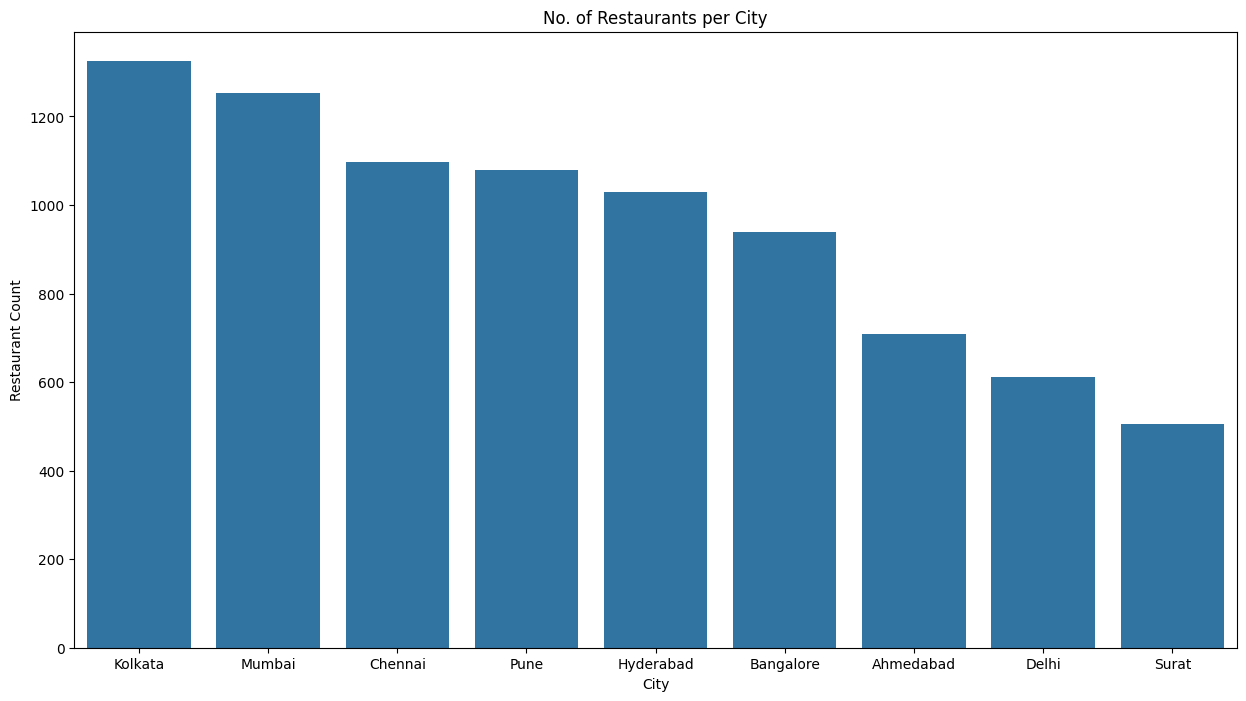

In [9]:
"""Goegraphical Analysis: This is to check the number of restuarants per city"""
city_restaurant_counts = Swiggy.groupby('City')['Restaurant'].nunique().reset_index()
city_restaurant_counts.columns = ['City', 'Restaurant Count']

city_restaurant_counts = city_restaurant_counts.sort_values(by='Restaurant Count', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(data=city_restaurant_counts, x='City', y='Restaurant Count').set_title('No. of Restaurants per City')

#### INTERPRETATION : To check the rate at which the restaurants are spread throughout the countries, if the capitals are more populated and we were not proven otherwise.

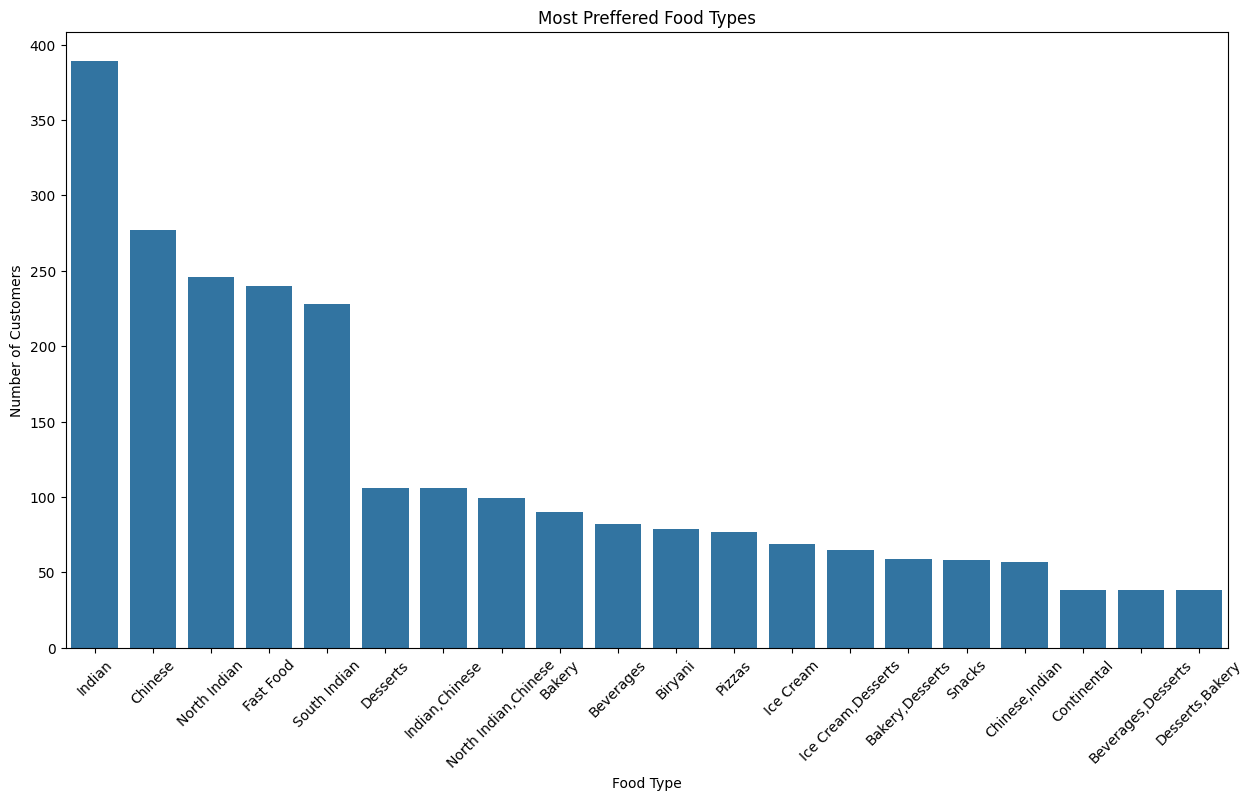

In [10]:
"""Food Type Analysis: This ia aimed at checking the most preferred types of meal 
by the customers."""

# Group by 'Food type' and count unique 'ID' entries (assuming 'ID' represents unique customers)
Foodtype_counts = Swiggy.groupby('Food type')['ID'].nunique().reset_index()
Foodtype_counts.columns = ['Food type', 'Customer Count']

# Sort values by Customer Count for better visualization
Foodtype_counts = Foodtype_counts.sort_values(by='Customer Count', ascending=False)

top_n = 20
Foodtype_counts_top_n = Foodtype_counts.head(top_n)

plt.figure(figsize=(15,8))
sns.barplot(data=Foodtype_counts_top_n, x='Food type', y='Customer Count').set_title('Most Preffered Food Types')
plt.xlabel('Food Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 45) #to rotate the Xaxis since some of the titles are not showing well
plt.show()




#### INTERPRETATION : This is analysis aimed at helping us know our customers preference so that we can channel our efforts into improving them.

## BEST PERFORMING RESTAURANTS

<Axes: xlabel='Restaurant', ylabel='Total ratings'>

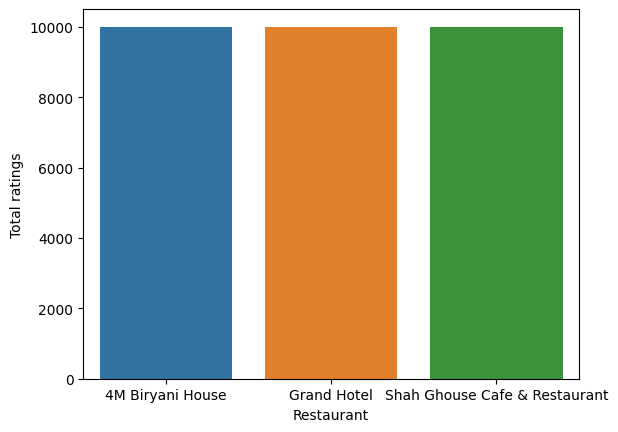

In [11]:
top_restaurants = Swiggy[['Restaurant', 'Total ratings']].sort_values(by='Total ratings', ascending=False).head(3)
top_restaurants.reset_index(drop=True, inplace=True)

# Create a bar plot using Seaborn
sns.barplot(x='Restaurant', y='Total ratings', data=top_restaurants,hue='Restaurant') 

<Axes: xlabel='Restaurant', ylabel='Delivery time'>

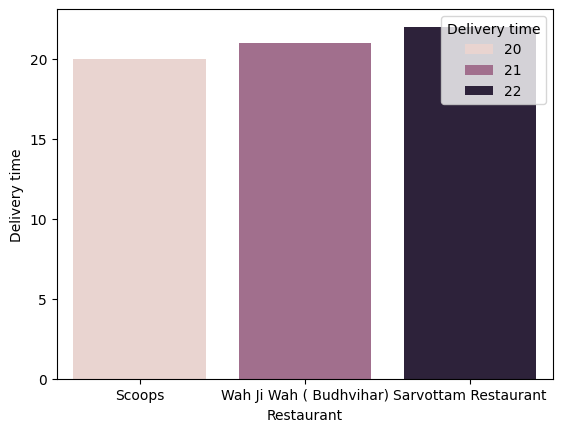

In [12]:
Delivery_rates = Swiggy[['Restaurant','Delivery time']].sort_values(by='Delivery time',ascending=True).head(3)
Delivery_rates.reset_index(drop=True,inplace=True)

sns.barplot(x='Restaurant', y='Delivery time', data=Delivery_rates,hue='Delivery time')